<a href="https://colab.research.google.com/github/ParveenDavid2394/Tensorflow/blob/master/Module4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
%tensorflow_version 2.x

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
fashion_mnist = keras.datasets.fashion_mnist # load the data

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [19]:
train_images.shape  # 60000 images with 28 x 28 pixels each (784 in total)

(60000, 28, 28)

In [18]:
train_images[59998][27] 

array([ 0,  0,  0,  0,  0,  0, 11, 54, 55, 61, 65, 69, 67, 67, 66, 63, 66,
       69, 66, 54, 50,  5,  0,  1,  0,  0,  0,  0], dtype=uint8)

In [20]:
train_labels[:10]


array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [21]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

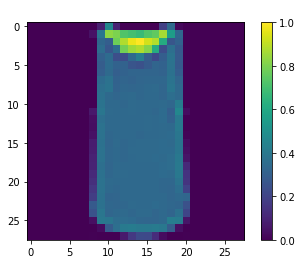

In [56]:
# display our train_images using matplotlib

plt.figure()
plt.imshow(train_images[2])
plt.colorbar()
plt.grid(False)
plt.title('Image')
plt.show()

## Preprocessing Data


In [28]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [31]:
train_images[3][1]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.28627451, 0.72941176, 0.69411765, 0.71764706,
       0.68627451, 0.7372549 , 0.90980392, 1.        , 0.8745098 ,
       0.85882353, 0.76078431, 0.70196078, 0.72941176, 0.83529412,
       0.57254902, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

## Defining Model Architecture and Model Training

In [32]:
# define model architecture
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), # input layer (1)
    keras.layers.Dense(128, activation='relu'), # hidden layer (2)
    keras.layers.Dense(10, activation='softmax') # output layer (3)
])

# compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [37]:
# train the model
model.fit(train_images, train_labels, epochs=2)

Epoch 1/2
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1809 - accuracy: 0.9319
Epoch 2/2
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1770 - accuracy: 0.9344


## Model Evaluation

In [38]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)

print('Test Acc: ', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.3632 - accuracy: 0.8876
Test Acc:  0.8876000046730042


## Predictions

In [47]:
predictions = model.predict(test_images)

class_names[np.argmax(predictions[11])]

'Sandal'

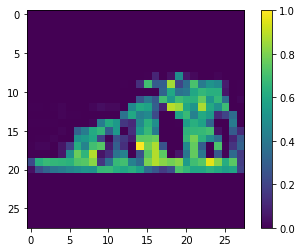

In [48]:
# display the image to check if correct

plt.figure()
plt.imshow(test_images[11])
plt.colorbar()
plt.grid(False)
plt.show()

Pick a number: 125


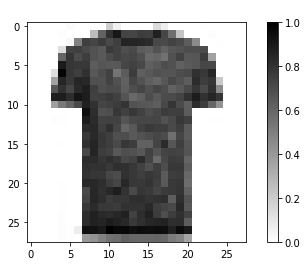

In [53]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.title("Excpected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.imshow(img, cmap=plt.cm.binary)
  plt.colorbar()
  plt.grid(False)
  plt.tight_layout()
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)